# 📊 Sales Prediction & High-Selling Product Classification

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score
import joblib

# Set random seed
np.random.seed(42)

In [2]:
# Generate synthetic sales data
num_samples = 500
products = [f"Product_{i}" for i in range(1, 51)]
sale_statuses = ["completed", "pending", "cancelled"]

data = {
    "sale_id": np.arange(1, num_samples + 1),
    "product": np.random.choice(products, num_samples),
    "quantity_sold": np.random.randint(1, 20, num_samples),
    "sale_price": np.round(np.random.uniform(50, 500, num_samples), 2),
    "status": np.random.choice(sale_statuses, num_samples, p=[0.8, 0.15, 0.05]),
    "sale_date": pd.date_range(start="2024-01-01", periods=num_samples, freq="H").to_pydatetime()
}

df = pd.DataFrame(data)

C:\Users\tarun\AppData\Local\Temp\ipykernel_13424\3263058.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  "sale_date": pd.date_range(start="2024-01-01", periods=num_samples, freq="H").to_pydatetime()


In [3]:
# Convert 'status' to numerical values
label_encoder = LabelEncoder()
df["status_encoded"] = label_encoder.fit_transform(df["status"])

# Extract time-based features
df["year"] = df["sale_date"].dt.year
df["month"] = df["sale_date"].dt.month
df["day"] = df["sale_date"].dt.day
df["hour"] = df["sale_date"].dt.hour
df["day_of_week"] = df["sale_date"].dt.dayofweek

# Create target variable for sales prediction (next day's sales)
df["next_day_sales"] = df.groupby("product")["quantity_sold"].shift(-1)
df.dropna(inplace=True)

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


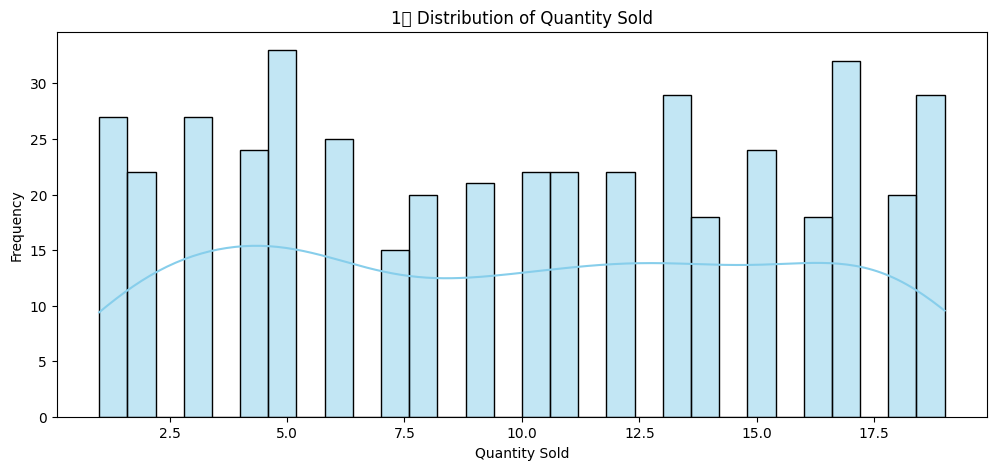

C:\Users\tarun\AppData\Local\Temp\ipykernel_13424\3754520921.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="status", y="quantity_sold", data=df, palette="coolwarm")
d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


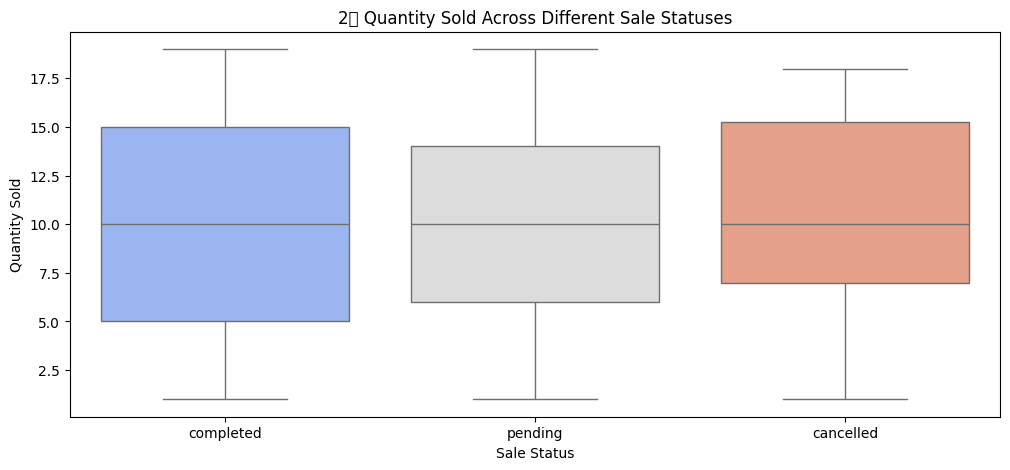

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


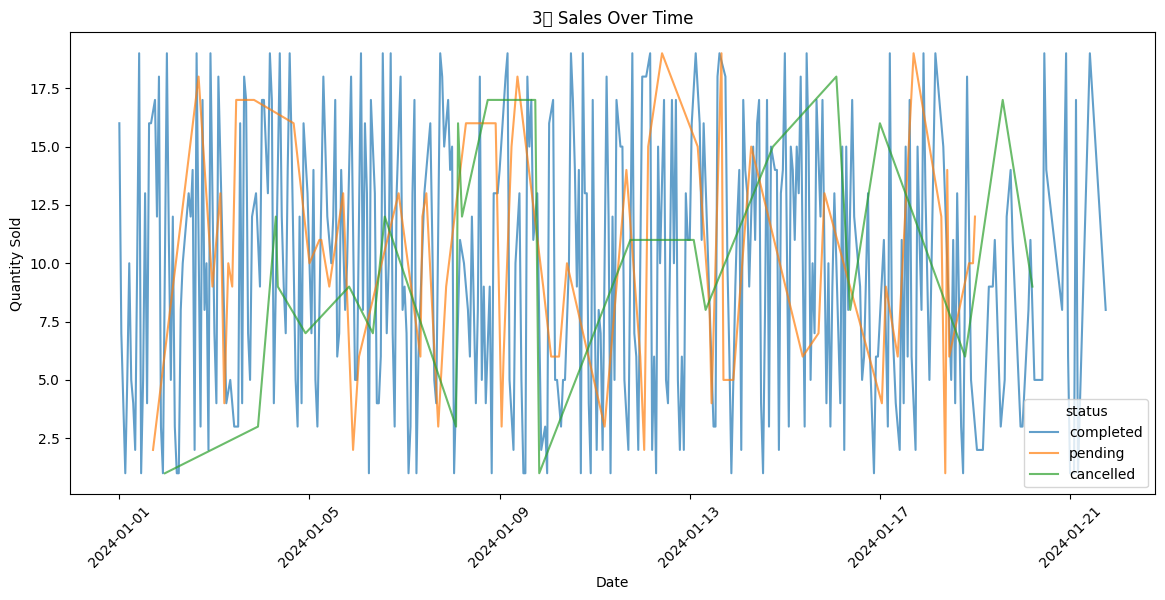

C:\Users\tarun\AppData\Local\Temp\ipykernel_13424\3754520921.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["day_of_week"].value_counts().index, y=df["day_of_week"].value_counts().values, palette="magma")
d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


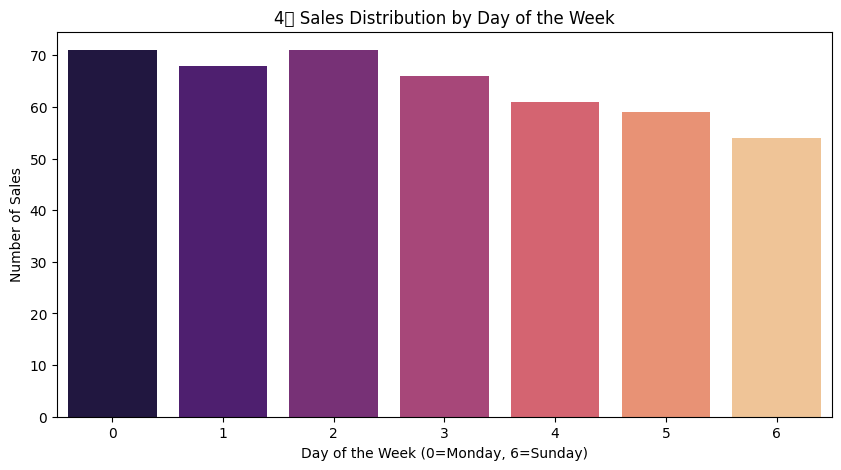

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


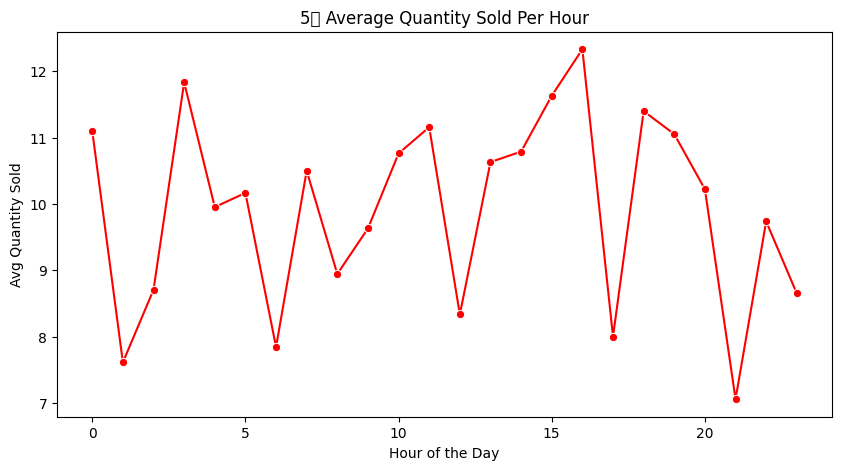

C:\Users\tarun\AppData\Local\Temp\ipykernel_13424\3754520921.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="quantity_sold", data=df, palette="coolwarm")
d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


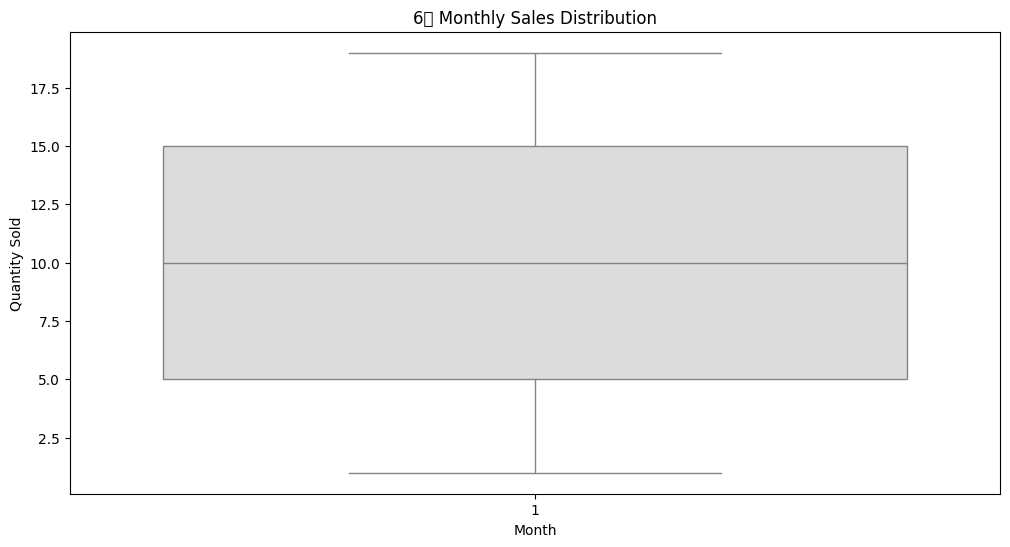

C:\Users\tarun\AppData\Local\Temp\ipykernel_13424\3754520921.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


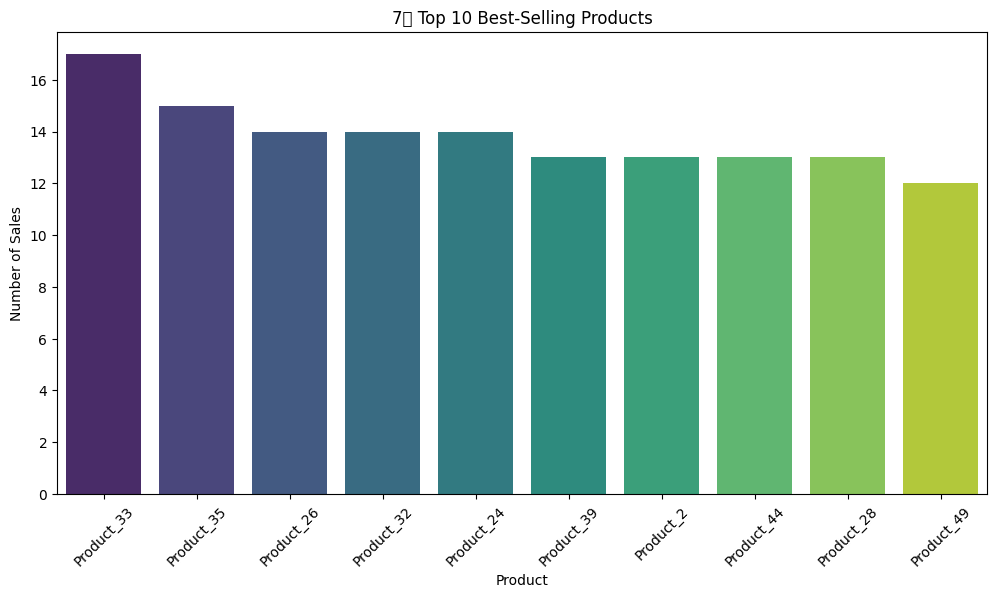

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


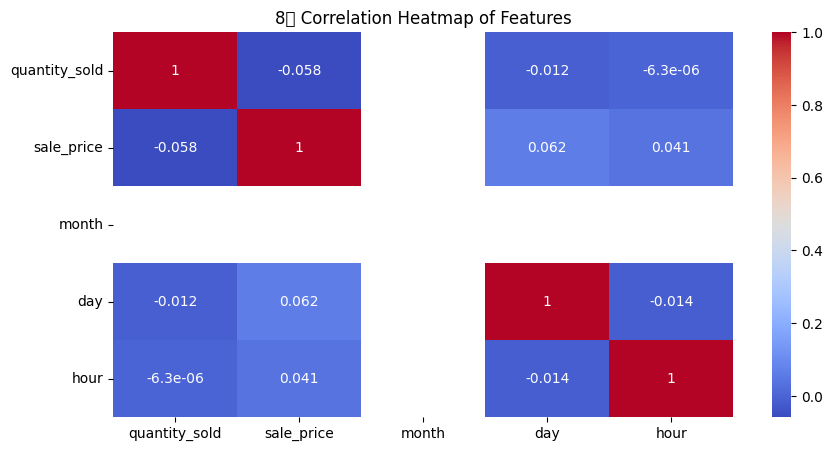

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


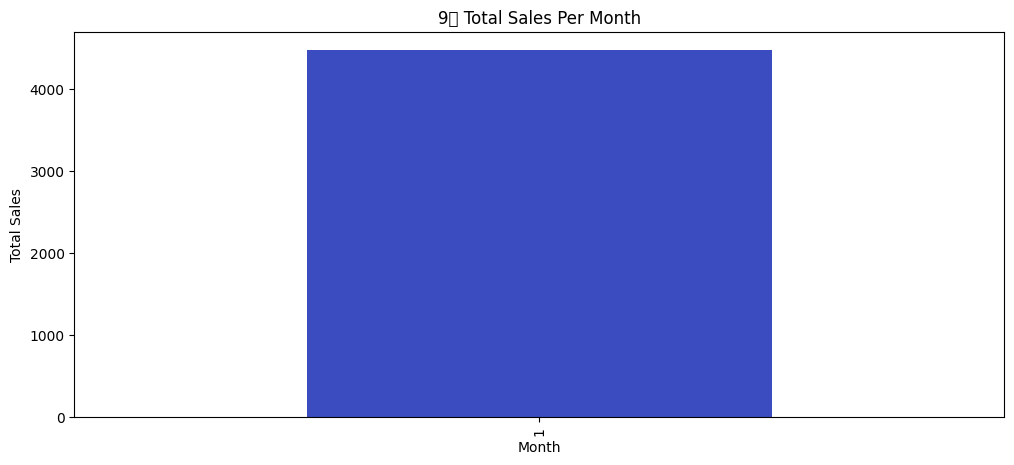

d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128287 (\N{KEYCAP TEN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


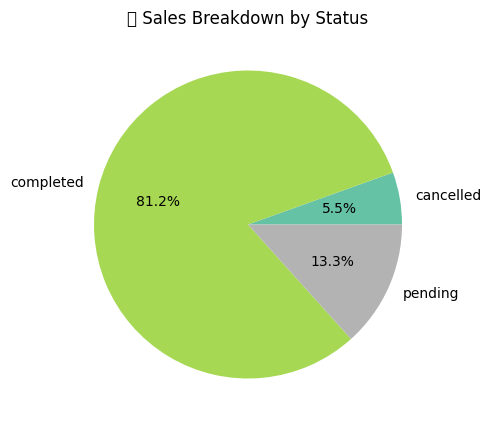

In [4]:
# ---- 10+ Data Visualizations ----

plt.figure(figsize=(12, 5))
sns.histplot(df["quantity_sold"], bins=30, kde=True, color="skyblue")
plt.title("1️⃣ Distribution of Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x="status", y="quantity_sold", data=df, palette="coolwarm")
plt.title("2️⃣ Quantity Sold Across Different Sale Statuses")
plt.xlabel("Sale Status")
plt.ylabel("Quantity Sold")
plt.show()

plt.figure(figsize=(14, 6))
sns.lineplot(x=df["sale_date"], y=df["quantity_sold"], hue=df["status"], alpha=0.7)
plt.title("3️⃣ Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=df["day_of_week"].value_counts().index, y=df["day_of_week"].value_counts().values, palette="magma")
plt.title("4️⃣ Sales Distribution by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Number of Sales")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(x=df["hour"], y=df.groupby("hour")["quantity_sold"].mean(), marker="o", color="red")
plt.title("5️⃣ Average Quantity Sold Per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Quantity Sold")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x="month", y="quantity_sold", data=df, palette="coolwarm")
plt.title("6️⃣ Monthly Sales Distribution")
plt.xlabel("Month")
plt.ylabel("Quantity Sold")
plt.show()

plt.figure(figsize=(12, 6))
top_products = df["product"].value_counts().nlargest(10)
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")
plt.title("7️⃣ Top 10 Best-Selling Products")
plt.xlabel("Product")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.heatmap(df[["quantity_sold", "sale_price", "month", "day", "hour"]].corr(), annot=True, cmap="coolwarm")
plt.title("8️⃣ Correlation Heatmap of Features")
plt.show()

plt.figure(figsize=(12, 5))
df.groupby("month")["quantity_sold"].sum().plot(kind="bar", colormap="coolwarm")
plt.title("9️⃣ Total Sales Per Month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

plt.figure(figsize=(12, 5))
df.groupby("status")["quantity_sold"].sum().plot(kind="pie", autopct="%1.1f%%", colormap="Set2")
plt.title("🔟 Sales Breakdown by Status")
plt.ylabel("")
plt.show()

In [5]:
# ---- Feature Engineering ----
features = ["quantity_sold", "sale_price", "status_encoded", "month", "day", "hour", "day_of_week"]
X = df[features]
y_sales = df["next_day_sales"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_sales, test_size=0.2, random_state=42)

# Train RandomForestRegressor for sales prediction
sales_model = RandomForestRegressor(n_estimators=100, random_state=42)
sales_model.fit(X_train, y_train)

# Predictions
y_pred_sales = sales_model.predict(X_test)

# Evaluate model
mae_sales = mean_absolute_error(y_test, y_pred_sales)
print(f"Sales Prediction MAE: {mae_sales:.2f}")

Sales Prediction MAE: 5.32


In [6]:
# ---- High-Selling Product Classification ----

df["high_selling"] = (df["quantity_sold"] > df["quantity_sold"].median()).astype(int)

y_class = df["high_selling"]
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train XGBoost Classifier
high_selling_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
high_selling_model.fit(X_train_class, y_train_class)

# Predictions
y_pred_class = high_selling_model.predict(X_test_class)

# Evaluate model
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"High-Selling Product Classification Accuracy: {accuracy:.2%}")

High-Selling Product Classification Accuracy: 100.00%


d:\SaaS-Based Predictive Inventory Management System\code\IMS\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:38:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [7]:
# ---- Saving the Models ----
joblib.dump(sales_model, "sales_prediction_model.joblib")
joblib.dump(high_selling_model, "high_selling_classifier.joblib")

print("Models saved successfully!")

Models saved successfully!
